In [111]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

In [143]:
from sklearn.datasets import load_boston

In [113]:
boston = load_boston()

In [114]:
print("KEY:\n{}".format(boston.keys()))

KEY:
dict_keys(['data', 'feature_names', 'target', 'DESCR'])


In [115]:
print("values:\n{}".format(boston ["feature_names"]))

values:
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [116]:
#ファイルの説明
print("desc:\n{}".format(boston['DESCR']))

desc:
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town


In [117]:
boston["data"].shape

(506, 13)

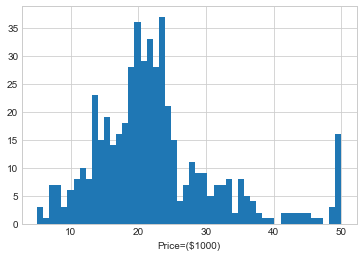

In [118]:
plt.hist(boston.target, bins=50)
plt.xlabel("Price=($1000)")

In [119]:
boston.values

<function Bunch.values>

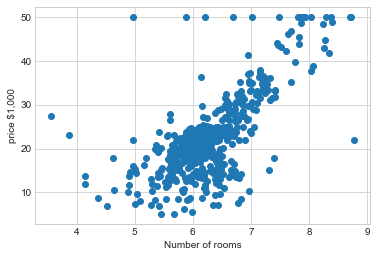

In [120]:
#RMは5番目：説明変数
plt.scatter(boston.data[:,5], boston.target)
plt.ylabel("price $1,000")
plt.xlabel("Number of rooms")

In [121]:
"""
気づき
部屋の数が多くなると価格帯も高くなる
"""

'\n気づき\n部屋の数が多くなると価格帯も高くなる\n'

In [122]:
#dfにする
boston_df = pd.DataFrame(boston.data)
#列名を追加
boston_df.columns = boston.feature_names

In [123]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [124]:
#y軸の設定
boston_df["Price"] = boston.target

In [125]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


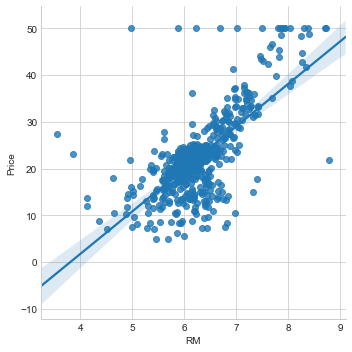

In [126]:
#サンプル図と回帰直せいんを引く
sns.lmplot('RM','Price',data = boston_df)

# 最小2乗法でイメージを掴む

In [127]:
X = boston_df.RM
X

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
5      6.430
6      6.012
7      6.172
8      5.631
9      6.004
10     6.377
11     6.009
12     5.889
13     5.949
14     6.096
15     5.834
16     5.935
17     5.990
18     5.456
19     5.727
20     5.570
21     5.965
22     6.142
23     5.813
24     5.924
25     5.599
26     5.813
27     6.047
28     6.495
29     6.674
       ...  
476    6.484
477    5.304
478    6.185
479    6.229
480    6.242
481    6.750
482    7.061
483    5.762
484    5.871
485    6.312
486    6.114
487    5.905
488    5.454
489    5.414
490    5.093
491    5.983
492    5.983
493    5.707
494    5.926
495    5.670
496    5.390
497    5.794
498    6.019
499    5.569
500    6.027
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [128]:
X.shape

(506,)

In [129]:
#2次元配列にする必要がある
X = np.vstack(boston_df['RM'])
X

array([[ 6.575],
       [ 6.421],
       [ 7.185],
       [ 6.998],
       [ 7.147],
       [ 6.43 ],
       [ 6.012],
       [ 6.172],
       [ 5.631],
       [ 6.004],
       [ 6.377],
       [ 6.009],
       [ 5.889],
       [ 5.949],
       [ 6.096],
       [ 5.834],
       [ 5.935],
       [ 5.99 ],
       [ 5.456],
       [ 5.727],
       [ 5.57 ],
       [ 5.965],
       [ 6.142],
       [ 5.813],
       [ 5.924],
       [ 5.599],
       [ 5.813],
       [ 6.047],
       [ 6.495],
       [ 6.674],
       [ 5.713],
       [ 6.072],
       [ 5.95 ],
       [ 5.701],
       [ 6.096],
       [ 5.933],
       [ 5.841],
       [ 5.85 ],
       [ 5.966],
       [ 6.595],
       [ 7.024],
       [ 6.77 ],
       [ 6.169],
       [ 6.211],
       [ 6.069],
       [ 5.682],
       [ 5.786],
       [ 6.03 ],
       [ 5.399],
       [ 5.602],
       [ 5.963],
       [ 6.115],
       [ 6.511],
       [ 5.998],
       [ 5.888],
       [ 7.249],
       [ 6.383],
       [ 6.816],
       [ 6.145

In [130]:
Y = boston_df.Price
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [131]:
#リスト内表記
X = np.array([[value,1] for value in X])

In [132]:
#Numpyの線形回帰を行う
np.linalg.lstsq(X, Y)

(array([  9.10210898, -34.67062078]),
 array([ 22061.87919621]),
 2,
 array([ 143.99484122,    2.46656609]))

In [133]:
a, b = np.linalg.lstsq(X, Y)[0]

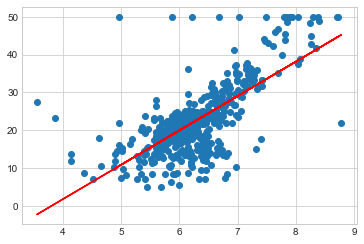

In [134]:
plt.plot(boston_df.RM, boston_df.Price, "o")
x = boston_df.RM
plt.plot(x, a*x+b, "r")

# 誤差の評価を行う

In [135]:
result = np.linalg.lstsq(X, Y)

In [136]:
#全ての点と直線を足し合わせたもの
result

(array([  9.10210898, -34.67062078]),
 array([ 22061.87919621]),
 2,
 array([ 143.99484122,    2.46656609]))

In [137]:
#距離の合計
error_total = result[1]
error_total

array([ 22061.87919621])

In [138]:
#平方根をとる
rmse = np.sqrt(error_total/len(X))

In [139]:
print("平均二乗誤差の平方根-{:0.2f}".format(rmse[0]))

平均二乗誤差の平方根-6.60


In [140]:
"""
+- 13.2の誤差で95%含まれている
"""

'\n+- 13.2の誤差で95%含まれている\n'

In [ ]:
#sicklearnを使った、

In [144]:
import sklearn
from sklearn.linear_model import LinearRegression as LR

In [145]:
model = LR()

In [146]:
X_2 = boston_df.drop("Price",1)

In [147]:
X_2.shape

(506, 13)

In [149]:
Y_2 = boston_df.Price

In [150]:
model.fit(X_2,Y_2)

/Users/keisuke/.pyenv/versions/3.4.3/lib/python3.4/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [151]:
#切片
model.intercept_

36.491103280361621

In [152]:
#a：傾き
model.coef_

array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01])

In [157]:
#幾つあるのか
len(model.coef_)

13

In [159]:
coeff_df = pd.DataFrame(boston_df.columns)

In [160]:
coeff_df.columns = ['Features']

In [161]:
coeff_df['Coefficient Estimote'] = pd.Series(model.coef_)

In [163]:
coeff_df

,Features,Coefficient Estimote
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [164]:
# モデルと予測するサンプルに分けて行う